In [52]:
! pip install pandas matplotlib scikit-learn
# import library used for data management
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [44]:
# read the dataset
df_game = pd.read_csv('/content/Twitch_game_data_final.csv',encoding='ISO-8859-1')
# print out the dataset
print(df_game)
print(df_game.head())

          id                              Game  Month  Year  Hours_watched  \
0          1                 League of Legends      1  2016       94377226   
1          2  Counter-Strike: Global Offensive      1  2016       47832863   
2          3                            Dota 2      1  2016       45185893   
3          4                       Hearthstone      1  2016       39936159   
4          5       Call of Duty: Black Ops III      1  2016       16153057   
...      ...                               ...    ...   ...            ...   
18595  18596                          PlateUp!      9  2023         560064   
18596  18597                       PokÃ©mon GO      9  2023         551596   
18597  18598                       Bloons TD 6      9  2023         540735   
18598  18599                   Ragnarok Online      9  2023         533644   
18599  18600                        Bloodborne      9  2023         530610   

       Hours_streamed  Peak_viewers  Peak_channels  Streamers  

In [45]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18600 non-null  int64  
 1   Game              18599 non-null  object 
 2   Month             18600 non-null  int64  
 3   Year              18600 non-null  int64  
 4   Hours_watched     18600 non-null  int64  
 5   Hours_streamed    18600 non-null  int64  
 6   Peak_viewers      18600 non-null  int64  
 7   Peak_channels     18600 non-null  int64  
 8   Streamers         18600 non-null  int64  
 9   Avg_viewers       18600 non-null  int64  
 10  Avg_channels      18600 non-null  int64  
 11  Avg_viewer_ratio  18600 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.7+ MB


In [38]:
#find the null row
for idx, is_null in enumerate(pd.isnull(df_game['Game'])):
    if is_null:
        print(f"Row number with missing game: {idx}")

Row number with missing game: 7561


In [42]:
#drop the null row
df_game_clean = df_game.dropna(subset=['Game'])

In [43]:
# finalized dataset with no null
df_game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18599 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18599 non-null  int64  
 1   Game              18599 non-null  object 
 2   Month             18599 non-null  int64  
 3   Year              18599 non-null  int64  
 4   Hours_watched     18599 non-null  int64  
 5   Hours_streamed    18599 non-null  int64  
 6   Peak_viewers      18599 non-null  int64  
 7   Peak_channels     18599 non-null  int64  
 8   Streamers         18599 non-null  int64  
 9   Avg_viewers       18599 non-null  int64  
 10  Avg_channels      18599 non-null  int64  
 11  Avg_viewer_ratio  18599 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.8+ MB


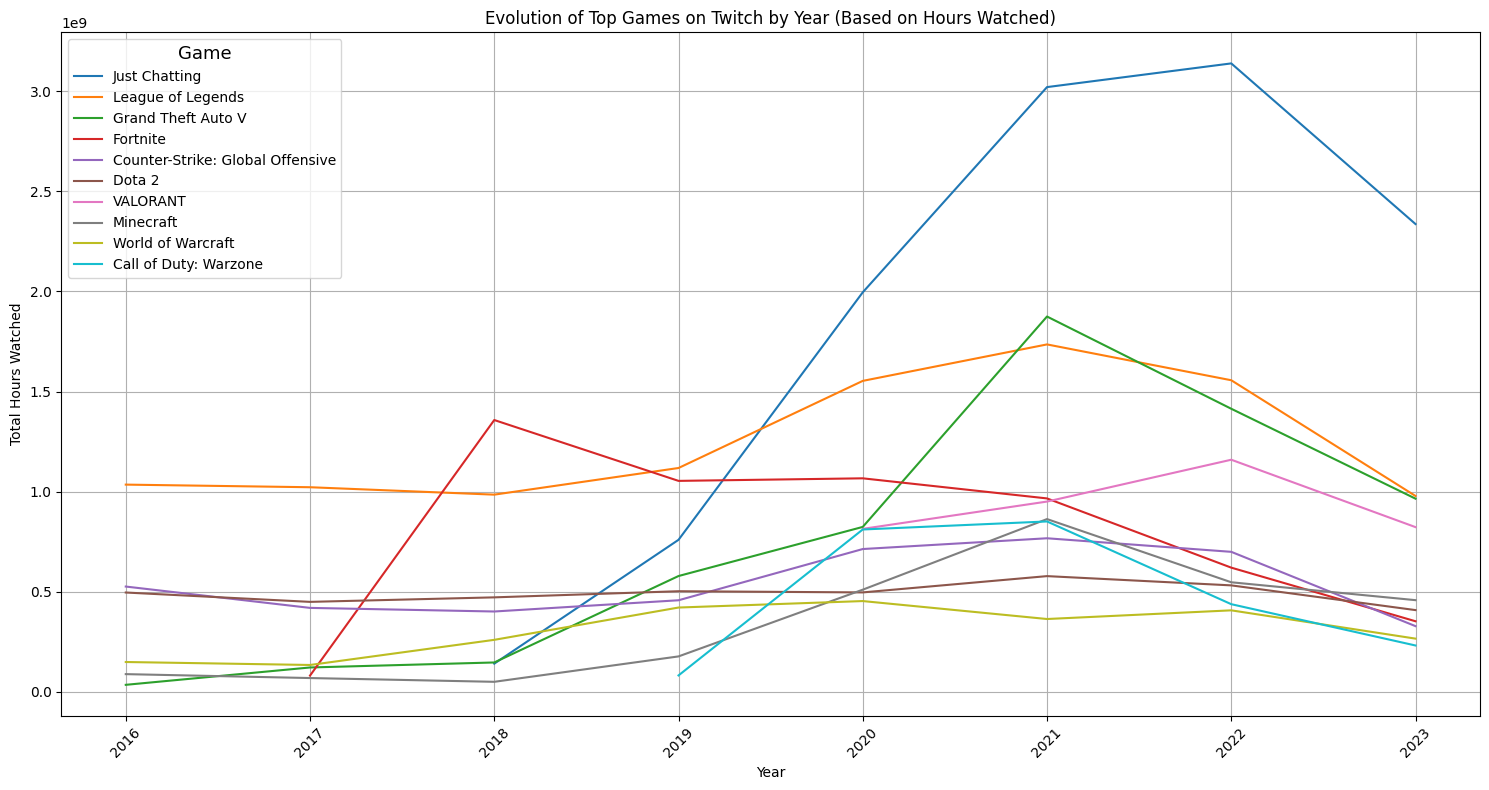

In [46]:
# Grouping data by game and year, and summing the hours watched
grouped_data = df_game_clean.groupby(['Game', 'Year'])['Hours_watched'].sum().reset_index()

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot(index='Year', columns='Game', values='Hours_watched')

# Selecting the top games based on the total hours watched across all years
top_games = pivoted_data.sum().sort_values(ascending=False).head(10).index

# Filtering the data to only include these top games
top_games_data = pivoted_data[top_games]

# Plotting the data
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_games_data, dashes=False)
plt.title('Evolution of Top Games on Twitch by Year (Based on Hours Watched)')
plt.ylabel('Total Hours Watched')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Game', title_fontsize='13', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

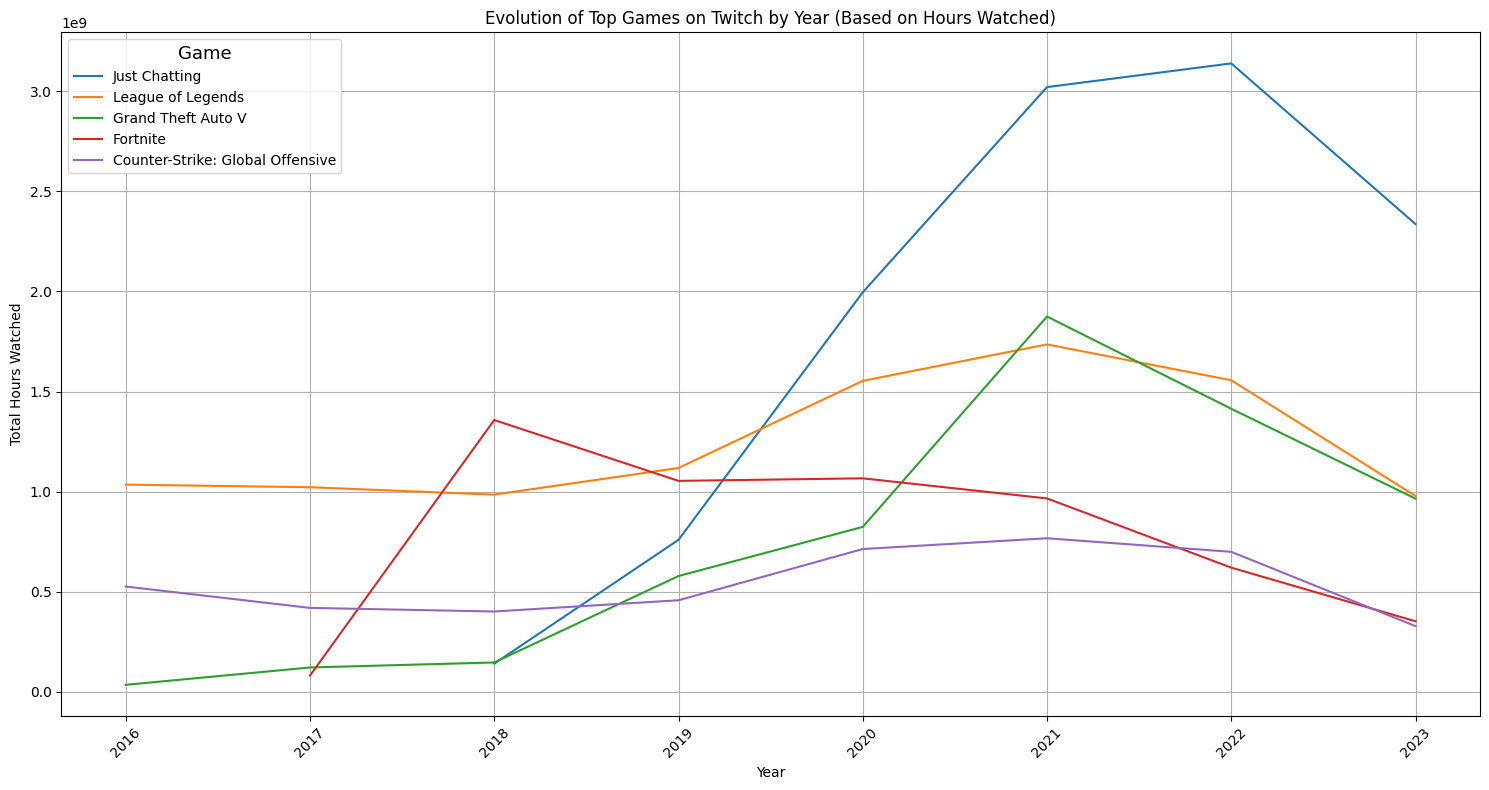

In [47]:
# Grouping data by game and year, and summing the hours watched
grouped_data = df_game_clean.groupby(['Game', 'Year'])['Hours_watched'].sum().reset_index()

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot(index='Year', columns='Game', values='Hours_watched')

# Selecting the top games based on the total hours watched across all years
top_games = pivoted_data.sum().sort_values(ascending=False).head(5).index

# Filtering the data to only include these top games
top_games_data = pivoted_data[top_games]

# Plotting the data
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_games_data, dashes=False)
plt.title('Evolution of Top Games on Twitch by Year (Based on Hours Watched)')
plt.ylabel('Total Hours Watched')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Game', title_fontsize='13', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

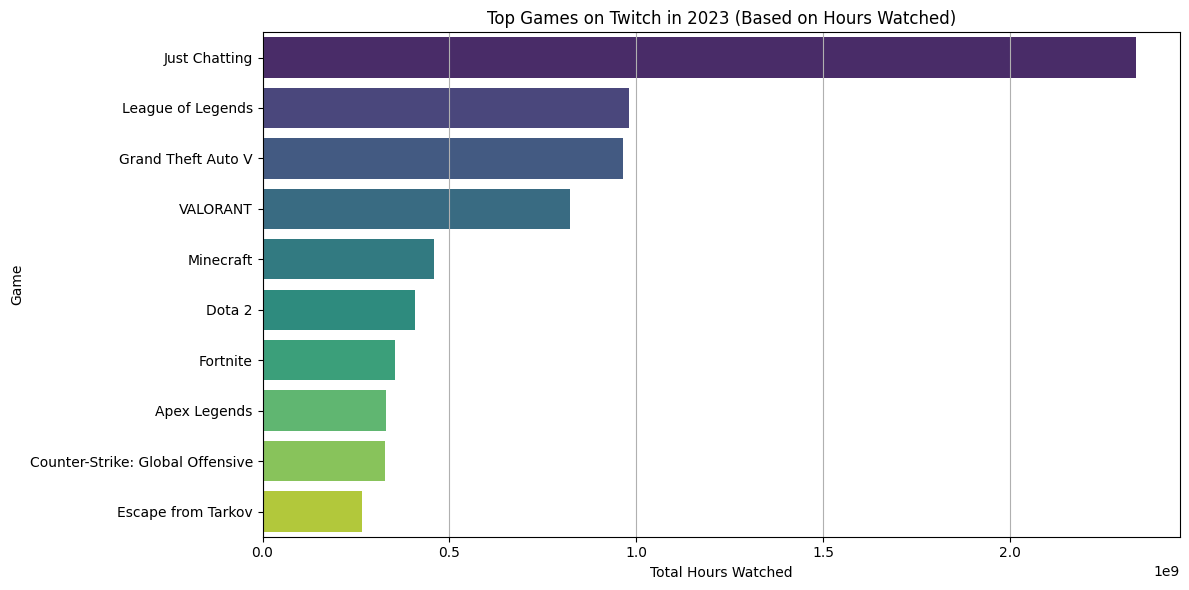

In [48]:
# Identifying the most recent year in the data
most_recent_year = df_game_clean['Year'].max()

# Filtering the data for the most recent year
recent_year_data = df_game_clean[df_game_clean['Year'] == most_recent_year]

# Grouping data by game and summing the hours watched for the most recent year
grouped_recent_year_data = recent_year_data.groupby('Game')['Hours_watched'].sum().reset_index()

# Sorting the data to get the top games based on hours watched
sorted_recent_year_data = grouped_recent_year_data.sort_values(by='Hours_watched', ascending=False).head(10)

# Creating a horizontal bar chart for the top games
plt.figure(figsize=(12, 6))
sns.barplot(y='Game', x='Hours_watched', data=sorted_recent_year_data, palette="viridis")
plt.title(f'Top Games on Twitch in {most_recent_year} (Based on Hours Watched)')
plt.xlabel('Total Hours Watched')
plt.ylabel('Game')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

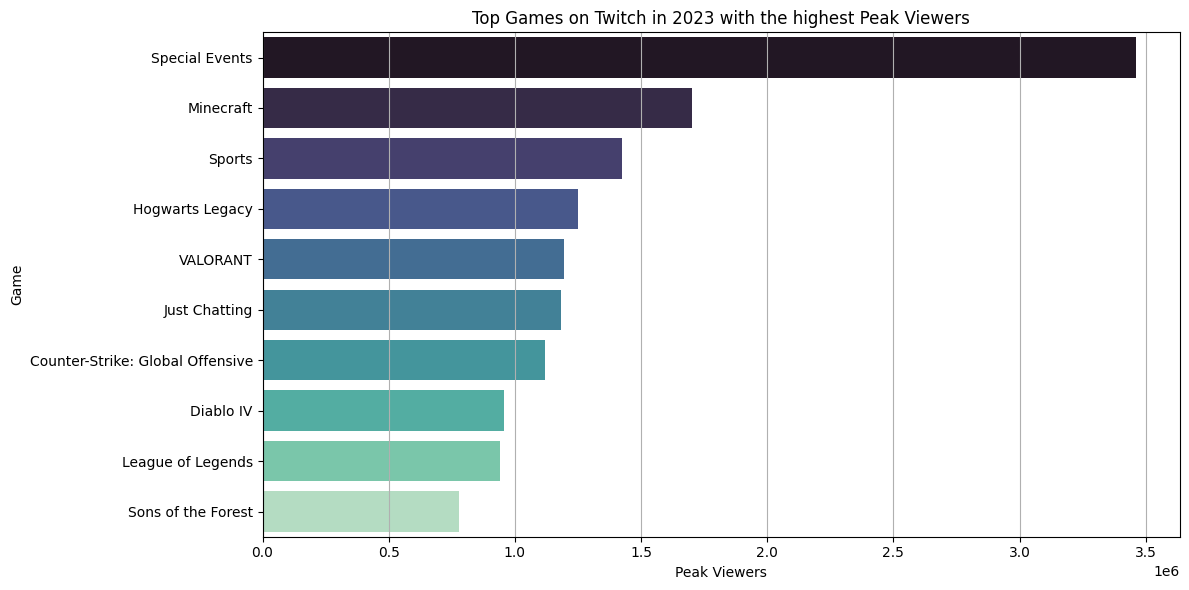

In [50]:
# Identifying the most recent year in the data
most_recent_year = df_game_clean['Year'].max()

# Filtering the data for the most recent year
recent_year_data = df_game_clean[df_game_clean['Year'] == most_recent_year]

# Grouping data by game for the most recent year and getting the maximum peak viewers
grouped_peak_viewers_data = recent_year_data.groupby('Game')['Peak_viewers'].max().reset_index()

# Sorting the data to get the top games based on peak viewers
sorted_peak_viewers_data = grouped_peak_viewers_data.sort_values(by='Peak_viewers', ascending=False).head(10)

# Creating a horizontal bar chart for the top games based on peak viewers
plt.figure(figsize=(12, 6))
sns.barplot(y='Game', x='Peak_viewers', data=sorted_peak_viewers_data, palette="mako")
plt.title(f'Top Games on Twitch in {most_recent_year} with the highest Peak Viewers')
plt.xlabel('Peak Viewers')
plt.ylabel('Game')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

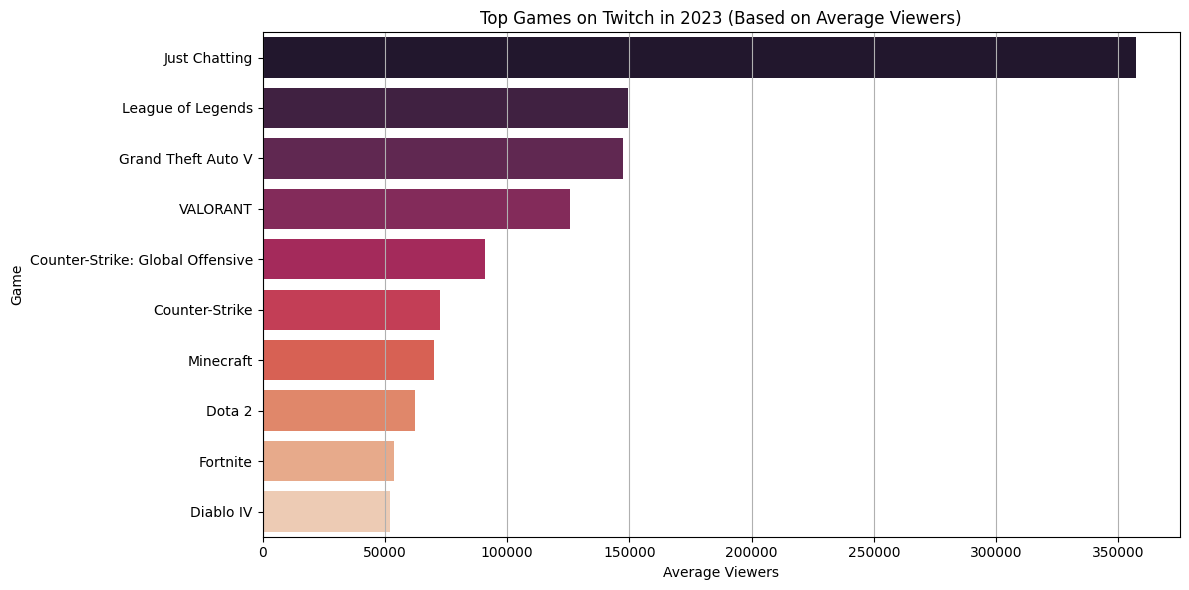

In [51]:
# Identifying the most recent year in the data
most_recent_year = df_game_clean['Year'].max()

# Filtering the data for the most recent year
recent_year_data = df_game_clean[df_game_clean['Year'] == most_recent_year]

# Grouping data by game for the most recent year and getting the average viewers
grouped_avg_viewers_data = recent_year_data.groupby('Game')['Avg_viewers'].mean().reset_index()

# Sorting the data to get the top games based on average viewers
sorted_avg_viewers_data = grouped_avg_viewers_data.sort_values(by='Avg_viewers', ascending=False).head(10)

# Creating a horizontal bar chart for the top games based on average viewers
plt.figure(figsize=(12, 6))
sns.barplot(y='Game', x='Avg_viewers', data=sorted_avg_viewers_data, palette="rocket")
plt.title(f'Top Games on Twitch in {most_recent_year} (Based on Average Viewers)')
plt.xlabel('Average Viewers')
plt.ylabel('Game')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

avg viewers & Hours watched --> have similiar top games --> would be good to put tgt for analysis
